In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.utils import load_img
from keras import layers, models, optimizers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential

In [ ]:
BATCH_SIZE = 32
NUM_CLASSES = 4

In [ ]:
# img=load_img("/content/drive/MyDrive/Data/Test/20/301.jpg")
# plt.imshow(img)

In [ ]:
train=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test=ImageDataGenerator(rescale=1./255)

In [ ]:
# from keras.applications import VGG16

In [ ]:
# base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

In [ ]:
traindataset=train.flow_from_directory('/content/drive/MyDrive/Data/Train/',
                                       target_size=(256,256),
                                       batch_size=32,
                                       class_mode="categorical")

Found 3485 images belonging to 4 classes.


In [ ]:
testdataset=test.flow_from_directory('/content/drive/MyDrive/Data/Test/',
                                       target_size=(256,256),
                                       batch_size=32,
                                       class_mode="categorical")

Found 371 images belonging to 4 classes.


In [ ]:
# for layer in base_model.layers:
#     layer.trainable = True

In [ ]:
traindataset.class_indices

{'20': 0, '30': 1, '40': 2, '50': 3}

In [ ]:
traindataset.classes

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
model_fit=model.fit(traindataset,
                    steps_per_epoch=traindataset.samples // BATCH_SIZE,
                    epochs=10,
                    validation_data=testdataset,
                    validation_steps=testdataset.samples // BATCH_SIZE,
                    callbacks=[early_stopping])

Epoch 1/10
108/108 [==============================] - 1829s 17s/step - loss: 1.0854 - accuracy: 0.4269 - val_loss: 1.0597 - val_accuracy: 0.4034
Epoch 2/10
108/108 [==============================] - 56s 514ms/step - loss: 0.9696 - accuracy: 0.4622 - val_loss: 1.0358 - val_accuracy: 0.4091
Epoch 3/10
108/108 [==============================] - 54s 503ms/step - loss: 0.9819 - accuracy: 0.4434 - val_loss: 1.0496 - val_accuracy: 0.3977
Epoch 4/10
108/108 [==============================] - 55s 507ms/step - loss: 0.9474 - accuracy: 0.4683 - val_loss: 1.1193 - val_accuracy: 0.3778
Epoch 5/10
108/108 [==============================] - 55s 511ms/step - loss: 0.9553 - accuracy: 0.4535 - val_loss: 1.0462 - val_accuracy: 0.3892


In [ ]:
test_loss, test_acc = model.evaluate(testdataset, steps=testdataset.samples // BATCH_SIZE)
print(f'Test accuracy: {test_acc}')

 1/11 [=>............................] - ETA: 1s - loss: 1.0078 - accuracy: 0.5312

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/my_model.h5')

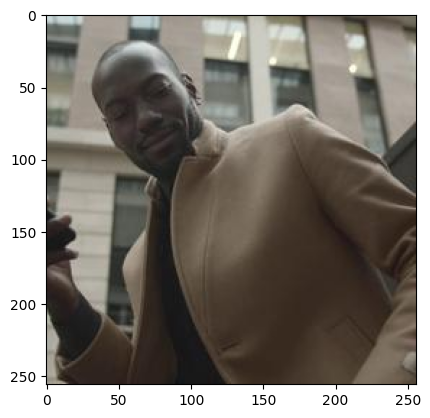

In [ ]:
img=load_img("/content/drive/MyDrive/Frames/guy_0000.jpg")
plt.imshow(img)

In [ ]:
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

In [ ]:
img_array /= 255.

In [ ]:
predictions = model.predict(img_array)

# Get the predicted class
predicted_class = np.argmax(predictions[0])
class_labels = traindataset.class_indices
class_labels = {v: k for k, v in class_labels.items()}
predicted_label = class_labels[predicted_class]

print(f'Predicted class: {predicted_label}')

1/1 [==============================] - 0s 24ms/step
Predicted class: 30
